# 1. Makng or triangulating a mesh from points

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial import Delaunay

In [3]:
from matplotlib import colormaps
list(colormaps)

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'grey',
 'gist_grey',
 'gist_yerg',
 'Grays',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viri

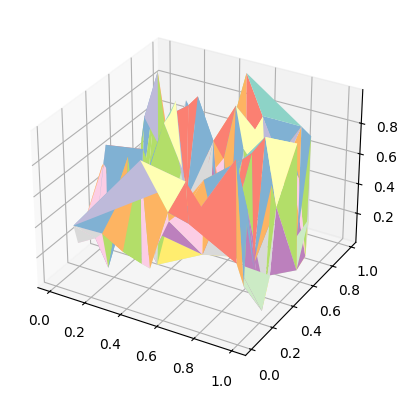

In [4]:
# Generate random 3D point cloud as an example
point_cloud = np.random.rand(100, 3)

# Perform Delaunay triangulation
tri = Delaunay(point_cloud)

# Plot the 3D point cloud
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(point_cloud[:, 0], point_cloud[:, 1], point_cloud[:, 2], triangles=tri.simplices, cmap='Set3_r')
plt.show()

# 2. Opening the written PLY file

* i. Viewing depth of the image

In [5]:
b_depth = np.load('results/aligned/DRM/test_pairs/final-depth/ZA941DA04-J11@9=person_whole_back_depth.npy')
f_depth = np.load('results/aligned/DRM/test_pairs/final-depth/ZA941DA04-J11@9=person_whole_front_depth.npy')

In [6]:
print(f_depth.shape)
print(b_depth.shape)

(512, 320)
(512, 320)


In [7]:
print(f_depth)
print(b_depth)

[[ 2.20996328e-04  5.13643026e-05  9.83350910e-05 ...  1.57041010e-04
   6.95982017e-05  4.68789076e-04]
 [ 1.08975917e-04  1.63521618e-04  4.33176756e-05 ...  3.36733647e-05
   6.27399422e-05  1.64381694e-04]
 [ 1.46430917e-04  6.54608011e-05  7.18794763e-05 ...  6.81253150e-05
   1.69405248e-04  3.48081812e-05]
 ...
 [ 1.15705188e-04  1.91109721e-04  8.02455470e-05 ...  7.67745078e-05
   1.12604816e-04  5.22714108e-05]
 [ 3.51784285e-04 -5.47058880e-06  1.32083893e-04 ...  2.84118578e-05
   1.37529802e-04  1.00847799e-04]
 [ 5.74006699e-05  1.74455345e-04  1.02976337e-04 ... -9.68994573e-06
   1.29885972e-04 -1.82796735e-04]]
[[-8.6306594e-05  1.4569191e-04 -3.7032645e-05 ... -4.9456488e-05
  -2.4348684e-04  9.3302224e-05]
 [ 2.6243739e-04 -1.8145191e-04 -7.5761694e-05 ... -2.2114860e-04
   3.4182845e-04 -4.2221363e-04]
 [-1.5834300e-04 -2.4237204e-05 -8.7881461e-05 ... -7.2534662e-05
  -2.9175542e-04  1.3108365e-04]
 ...
 [ 6.5355562e-05 -6.6853594e-05 -2.6871916e-05 ... -6.4044259e

### ii. lets read point cloud

In [8]:
import open3d as o3d

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [9]:
pcd = o3d.io.read_point_cloud('results/aligned/pcd(Fast march. r=3)/test_pairs/ZA941DA04-J11@9=person.ply')

In [10]:
pcd

PointCloud with 58748 points.

In [11]:
vertices = np.asarray(pcd.points)
print(vertices)

[[ 0.074219  0.859375 -0.008567]
 [ 0.078125  0.859375 -0.00506 ]
 [ 0.082031  0.859375 -0.001877]
 ...
 [ 0.136719 -0.828125  0.013973]
 [ 0.140625 -0.828125  0.015019]
 [ 0.144531 -0.828125  0.018155]]


* iii. visualize

In [12]:
o3d.visualization.draw_geometries([pcd]) 

# 3. Surface reconstruction 

i. Scipy delaunay

In [13]:
tri = Delaunay(vertices)
print(tri)

In [14]:
# Extract triangles from the Delaunay triangulation
triangles = vertices[tri.simplices]
triangles

array([[[ 1.09375e-01, -8.24219e-01,  1.14230e-02],
        [ 1.05469e-01, -8.24219e-01,  1.78660e-02],
        [ 1.05469e-01, -8.24219e-01,  2.11810e-02],
        [ 1.17188e-01, -8.28125e-01,  1.40040e-02]],

       [[ 1.09375e-01, -8.24219e-01,  4.84270e-02],
        [ 1.17188e-01, -8.08594e-01,  5.82820e-02],
        [ 1.09375e-01, -8.20312e-01,  5.59160e-02],
        [ 1.17188e-01, -8.24219e-01,  5.56400e-02]],

       [[ 1.09375e-01, -8.24219e-01,  4.84270e-02],
        [ 1.13281e-01, -8.24219e-01,  5.66190e-02],
        [ 1.09375e-01, -8.20312e-01,  5.59160e-02],
        [ 1.17188e-01, -8.24219e-01,  5.56400e-02]],

       ...,

       [[ 3.51560e-02,  8.43750e-01,  1.34700e-03],
        [ 3.12500e-02,  8.39844e-01, -3.19470e-02],
        [ 2.73440e-02,  8.35938e-01, -6.43600e-03],
        [ 3.51560e-02,  8.43750e-01, -3.07930e-02]],

       [[ 3.51560e-02,  8.43750e-01,  1.34700e-03],
        [ 3.90620e-02,  8.47656e-01,  6.40000e-05],
        [ 3.12500e-02,  8.39844e-01, -3.194

NameError: name 'Poly3DCollection' is not defined

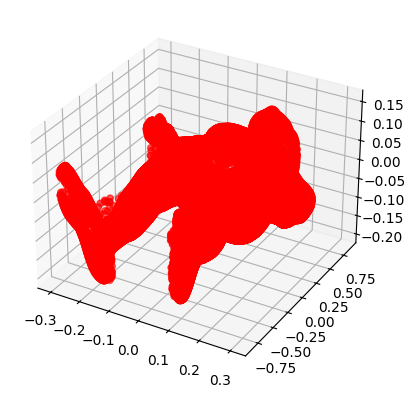

In [15]:

# Plot the mesh
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot vertices
ax.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2], c='r', marker='o')

# Plot triangles
for triangle in tri.simplices:
    vtx = vertices[triangle, :]
    tri_vert = [list(zip(vtx[0], vtx[1], vtx[2]))]
    ax.add_collection3d(Poly3DCollection(tri_vert, facecolors='cyan', linewidths=1, edgecolors='r', alpha=0.5))

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()


## ii. Alpha shapes

In [19]:
# Compute the convex hull of the point cloud
tetra_mesh, pt_map = o3d.geometry.TetraMesh.create_from_point_cloud(pcd)

# Define the alpha value for alpha shape
# alpha determines the size of the spheres used to carve out the space around each point in the point cloud. 
alpha = 0.05

# Reconstruct surface with the specified alpha value
print(f"Reconstructing surface with alpha={alpha}")
mesh = o3d.geometry.TriangleMesh.create_from_point_cloud_alpha_shape(pcd, alpha, tetra_mesh, pt_map)
mesh.compute_vertex_normals()
o3d.visualization.draw_geometries([mesh], mesh_show_back_face=True)


Reconstructing surface with alpha=0.05
[Open3D WARNING] [CreateFromPointCloudAlphaShape] invalid tetra in TetraMesh
[Open3D WARNING] [CreateFromPointCloudAlphaShape] invalid tetra in TetraMesh
[Open3D WARNING] [CreateFromPointCloudAlphaShape] invalid tetra in TetraMesh
[Open3D WARNING] [CreateFromPointCloudAlphaShape] invalid tetra in TetraMesh


## iii. Ball Pivoting

In [20]:
normals = pcd.estimate_normals()

In [22]:
# Define the radii for ball pivoting
# radii = [0.005, 0.01, 0.02, 0.04]
radii = [0.004,0.008,0.016,0.035]

# Reconstruct surface using ball pivoting
rec_mesh = o3d.geometry.TriangleMesh.create_from_point_cloud_ball_pivoting(pcd, o3d.utility.DoubleVector(radii))

# Visualize the original point cloud and the reconstructed mesh
o3d.visualization.draw_geometries([pcd, rec_mesh])


In [23]:
# mesh smoothing to fill holes and improve surface quality
rec_mesh.filter_smooth_laplacian(10)     # number of iterations for smoothing.

TriangleMesh with 58748 points and 108480 triangles.

In [24]:
o3d.visualization.draw_geometries([pcd, rec_mesh])

## iv. Poisson Reconstruction 

a. First we have to estimate normals, using these normals of the points, we estimate the planes perpendicular to the normals. This gives us the reconstructed surface

How is the normal for the points calculated? thats the question i am pondering right now.

Is it that we should fit a plane to the local neighborhood of each point and calculates the normal vector of that plane as the estimated normal for the point.

In [25]:
pcd.normals = o3d.utility.Vector3dVector(np.zeros(
    (1, 3)))

In [26]:
pcd.estimate_normals()

In [27]:
# Normals visualized
o3d.visualization.draw_geometries([pcd], point_show_normal=True)

b. Normals for the back 

the following function propagates the normal orientation using a minimum spanning tree.

In [28]:
# Back normals visualized
pcd.orient_normals_consistent_tangent_plane(100)
o3d.visualization.draw_geometries([pcd], point_show_normal=True)

c. Use the normals to reconstruct surface

- depth parameter defines the depth of the octree used for the surface reconstruction and hence implies the resolution of the resulting triangle mesh. A higher depth value means a mesh with more details.
-

In [29]:
print('run Poisson surface reconstruction')
with o3d.utility.VerbosityContextManager(
        o3d.utility.VerbosityLevel.Debug) as cm:
    mesh, densities = o3d.geometry.TriangleMesh.create_from_point_cloud_poisson(pcd, depth=8)
print("Mesh:",mesh)
print("Densities:",densities)

run Poisson surface reconstruction
[Open3D DEBUG] Input Points / Samples: 58748 / 25850
[Open3D DEBUG] #   Got kernel density: 0.017071962356567383 (s), 586.58203125 (MB) / 586.58203125 (MB) / 709 (MB)
[Open3D DEBUG] #     Got normal field: 0.038037776947021484 (s), 595.64453125 (MB) / 595.64453125 (MB) / 709 (MB)
[Open3D DEBUG] Point weight / Estimated Area: 1.033266e-05 / 6.070232e-01
[Open3D DEBUG] #       Finalized tree: 0.021318912506103516 (s), 596.11328125 (MB) / 596.11328125 (MB) / 709 (MB)
[Open3D DEBUG] #  Set FEM constraints: 0.44228506088256836 (s), 596.11328125 (MB) / 596.11328125 (MB) / 709 (MB)
[Open3D DEBUG] #Set point constraints: 0.09077596664428711 (s), 596.11328125 (MB) / 596.11328125 (MB) / 709 (MB)
[Open3D DEBUG] Leaf Nodes / Active Nodes / Ghost Nodes: 259974 / 297048 / 65
[Open3D DEBUG] Memory Usage: 596.113 MB
Cycle[0] Depth[0/8]:	Updated constraints / Got system / Solved in:  0.000 /  0.000 /  0.000	(596.113 MB)	Nodes: 8
CG: 3.7301e-01 -> 3.7301e-01 -> 3.6788e

c. Visualize mesh

In [30]:
# Mesh visualized
o3d.visualization.draw_geometries([mesh])

d. Visualize Densities

In [31]:
densities = np.asarray(densities)
density_colors = plt.get_cmap('plasma')(
    (densities - densities.min()) / (densities.max() - densities.min()))
density_colors = density_colors[:, :3]
density_mesh = o3d.geometry.TriangleMesh()
density_mesh.vertices = mesh.vertices
density_mesh.triangles = mesh.triangles
density_mesh.triangle_normals = mesh.triangle_normals
density_mesh.vertex_colors = o3d.utility.Vector3dVector(density_colors)
o3d.visualization.draw_geometries([density_mesh])

In [150]:
pcd = o3d.io.read_point_cloud('results/aligned/pcd(Fast march. r=3)/test_pairs/ZA941DA04-J11@9=person.ply')

## Solution : Both front and back normals should not be overwritten. 

In [32]:

# Read the point cloud from the PLY file
pcd = o3d.io.read_point_cloud('results/aligned/pcd(Fast march. r=3)/test_pairs/ZA941DA04-J11@9=person.ply')

# Estimate normals for the front
pcd.estimate_normals()
pcd_front_normals = np.asarray(pcd.normals)  # Store front normals

# Orient normals consistently for the back
pcd.orient_normals_consistent_tangent_plane(100)
pcd_back_normals = np.asarray(pcd.normals)  # Store back normals

# Concatenate front and back normals
pcd_combined_normals = np.vstack((pcd_front_normals, pcd_back_normals))

# Perform Poisson surface reconstruction with combined normals
print('run Poisson surface reconstruction')
with o3d.utility.VerbosityContextManager(
        o3d.utility.VerbosityLevel.Debug) as cm:
    mesh, densities = o3d.geometry.TriangleMesh.create_from_point_cloud_poisson(
        pcd, pcd_combined_normals, depth=8)

# Visualize the reconstructed mesh
o3d.visualization.draw_geometries([mesh])


run Poisson surface reconstruction


TypeError: create_from_point_cloud_poisson(): incompatible function arguments. The following argument types are supported:
    1. (pcd: open3d.cuda.pybind.geometry.PointCloud, depth: int = 8, width: float = 0, scale: float = 1.1, linear_fit: bool = False, n_threads: int = -1) -> Tuple[open3d.cuda.pybind.geometry.TriangleMesh, open3d.cuda.pybind.utility.DoubleVector]

Invoked with: PointCloud with 58748 points., array([[-0.11646839,  0.99318575, -0.00414464],
       [-0.10114552,  0.99457656,  0.02422891],
       [-0.0907749 ,  0.9942437 ,  0.05691565],
       ...,
       [-0.00162325, -0.99397503, -0.10959471],
       [ 0.03132741, -0.99409389, -0.10390344],
       [ 0.10166331, -0.99297384, -0.06056002]]); kwargs: depth=8